<a href="https://colab.research.google.com/github/Mayank1325/Customer-Analytics/blob/main/Sentiment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [3]:
df=pd.read_csv('/content/Womens Clothing E-Commerce Reviews.csv')

In [4]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [10]:
df1=df.drop('Unnamed: 0',axis=1)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [12]:
df1.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [16]:
df1.describe(include='O')

,Title,Review Text,Division Name,Department Name,Class Name
count,19676,22641,23472,23472,23472
unique,13993,22634,3,6,20
top,Love it!,Perfect fit and i've gotten so many compliment...,General,Tops,Dresses
freq,136,3,13850,10468,6319


In [17]:
df1.nunique()

Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

In [18]:
df1.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [19]:
df1=df1.dropna()

In [22]:
df1.shape

(19662, 10)

**VISUALIZATION**

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
sns.set_theme(style="darkgrid")

Text(0.5, 1.0, 'Heatmap for Whole Data')

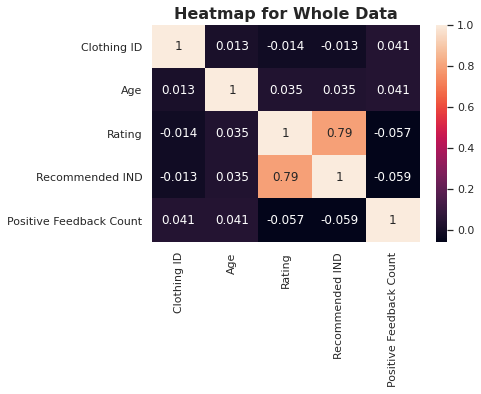

In [27]:
sns.heatmap(df1.corr(), annot=True) 
plt.title('Heatmap for Whole Data', fontsize = 16, fontweight = 'bold')

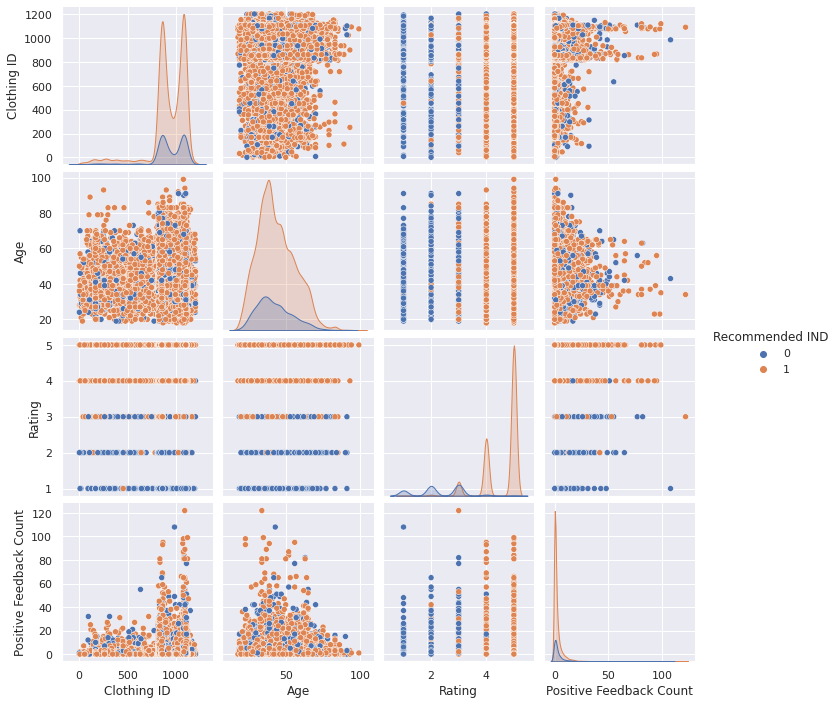

In [29]:
sns.pairplot(df1, hue='Recommended IND')

UNIVARIATE DISTRIBUTION


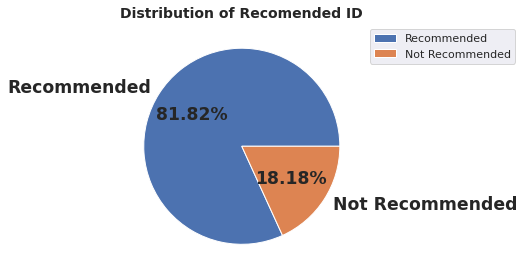

In [31]:
# Converting 0 & 1 in Not Recommended & Recommended
df1.loc[df1['Recommended IND'] == 0, 'Recommended IND'] = "Not Recommended" 
df1.loc[df1['Recommended IND'] == 1, 'Recommended IND'] = "Recommended"
plt.figure(figsize = (6,4))
x = df1['Recommended IND'].value_counts()
labels = 'Recommended','Not Recommended'
plt.pie(x = x,  labels = labels,
        autopct = '%.2f%%', 
        textprops = {'size' : 'x-large',
                   'fontweight' : 'bold'})
plt.title('Distribution of Recomended ID', fontsize = 14, fontweight = 'bold')
plt.legend(labels, loc="upper left", bbox_to_anchor = (1,1))
plt.tight_layout()
plt.show()

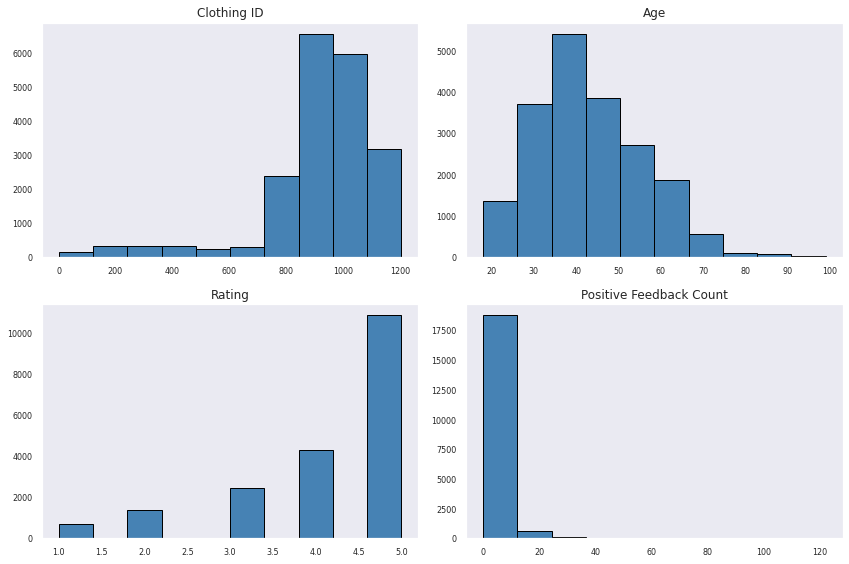

In [32]:
df1.hist(bins=10, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 2, 2))

**NLP**

In [37]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('all')
nltk.download('punkt')
# for stopwords removal
from nltk.corpus import stopwords
#for word tokenizing
from nltk import word_tokenize
#for stemming
from nltk.stem import PorterStemmer
#for making wordcloud
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/

In [38]:
def clean_text(text):
    
    # Make lowercase
    text = text.apply(lambda x: " ".join(x.lower() for x in x.split()))
# Remove special characters
    text = text.apply(lambda x: "".join(["" if ord(i) < 32 or ord(i) > 126 else i for i in x]))
# Remove whitespaces
    text = text.apply(lambda x: " ".join(x.strip() for x in x.split()))
            
    # Remove punctuation
    text = text.str.replace('[^\w\s]', '')
    
    # Remove numbers
    text = text.str.replace('\d+', '')
    # Convert to string
    text = text.astype(str)
    
    return text
# Applying clean_text function to data
df1['Filtered Review Text'] = clean_text(df1['Review Text'])
df1['Filtered Review Text'].head(2)

2    i had such high hopes for this dress and reall...
3    i love love love this jumpsuit its fun flirty ...
Name: Filtered Review Text, dtype: object

In [39]:
# Removing stop words
stop = stopwords.words('english')
df1['Filtered Review Text'] = df1['Filtered Review Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df1['Filtered Review Text'][:2]

2    high hopes dress really wanted work initially ...
3    love love love jumpsuit fun flirty fabulous ev...
Name: Filtered Review Text, dtype: object

In [40]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [42]:
SIA = SentimentIntensityAnalyzer()
df1["Review Text"]= df1["Review Text"].astype(str)

In [43]:
# Applying Model, Variable Creation
df1['Polarity Score']=df1["Review Text"].apply(lambda x:SIA.polarity_scores(x)['compound'])
df1['Neutral Score']=df1["Review Text"].apply(lambda x:SIA.polarity_scores(x)['neu'])
df1['Negative Score']=df1["Review Text"].apply(lambda x:SIA.polarity_scores(x)['neg'])
df1['Positive Score']=df1["Review Text"].apply(lambda x:SIA.polarity_scores(x)['pos'])

In [45]:
# Converting 0 to 1 Decimal Score to a Positive, Negative, Neutral Variable
df1['Sentiment']=''
df1.loc[df1['Polarity Score']>0,'Sentiment']='Positive'
df1.loc[df1['Polarity Score']==0,'Sentiment']='Neutral'
df1.loc[df1['Polarity Score']<0,'Sentiment']='Negative'
df1[['Polarity Score', 'Neutral Score', 'Negative Score', 'Positive Score', 'Sentiment']][:3]

,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment
2,0.9427,0.792,0.027,0.181,Positive
3,0.5727,0.340,0.226,0.434,Positive
4,0.9291,0.700,0.000,0.300,Positive


Text(0.5, 1.0, 'Distribution of Sentiment vs Recommended IND')

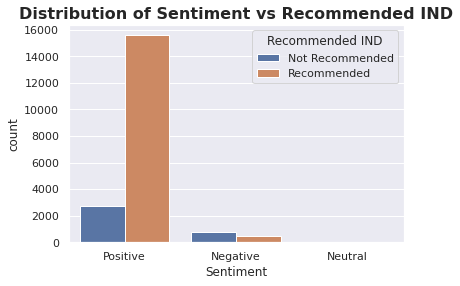

In [46]:
sns.countplot(x='Sentiment', hue='Recommended IND', data=df1)
plt.title("Distribution of Sentiment vs Recommended IND".format(x), fontsize=16, fontweight='bold')

Text(0.5, 1.0, 'Distribution of Sentiment vs Rating')

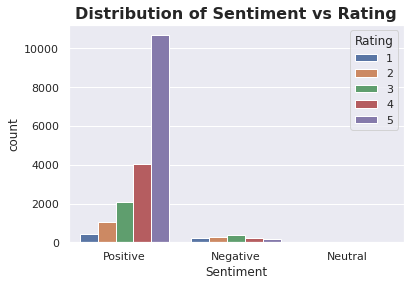

In [47]:
sns.countplot(x='Sentiment', hue='Rating',data=df1)   
plt.title("Distribution of Sentiment vs Rating".format(x), fontsize=16, fontweight='bold')

Text(0.5, 1.0, 'Distribution of Sentiment vs Division Name')

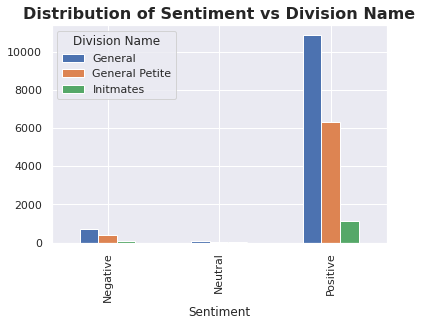

In [48]:
pd.crosstab(df1['Sentiment'], df1['Division Name']).plot(kind='bar')
plt.title('Distribution of Sentiment vs Division Name', fontweight='bold', fontsize=16)

Text(0.5, 1.0, 'Distribution of Sentiment vs Department Name')

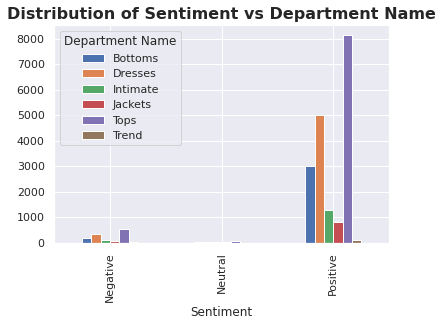

In [49]:
pd.crosstab(df1['Sentiment'], df1['Department Name']).plot(kind='bar')
plt.title('Distribution of Sentiment vs Department Name', fontweight='bold', fontsize=16)

Text(0.5, 1.0, 'Distribution of Sentiment vs Class Name')

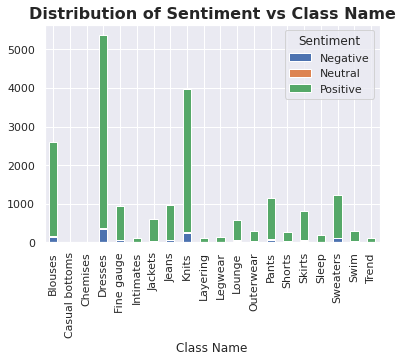

In [50]:
x = pd.crosstab(df1['Class Name'], df1['Sentiment'])
x.plot(kind='bar',stacked=True)
plt.title('Distribution of Sentiment vs Class Name', fontweight='bold', fontsize=16)

In [51]:
# Library for wordcloud
from wordcloud import WordCloud, STOPWORDS
# Creating a function cloud
def cloud(text,stopwords=stopwords): # title,
    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=stopwords,
                         ).generate(str(text))
    
    # Output Visualization
    fig = plt.figure(dpi=80, facecolor='k',edgecolor='k')
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    #plt.title(fontsize=50,color='y')
    plt.tight_layout(pad=0)
    plt.show()

Most Frequent Words in Low Review Text for Class Name


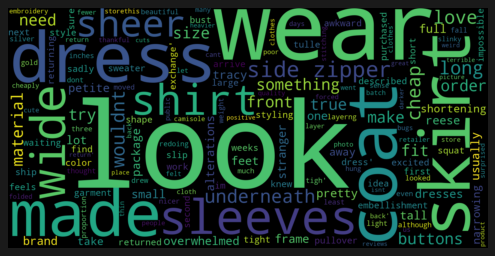

In [54]:
print('Most Frequent Words in Low Review Text for Class Name')
temp = df1['Filtered Review Text'][df1.Rating.astype(int) < 3]
# Modify Stopwords to Exclude Class types, suchs as "dress"
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df1["Class Name"][df1["Class Name"].notnull()].unique())])
# Cloud
cloud(temp.values,  stopwords = STOPWORDS)

Most Frequent Words in High Ratied Review Text for Class Name


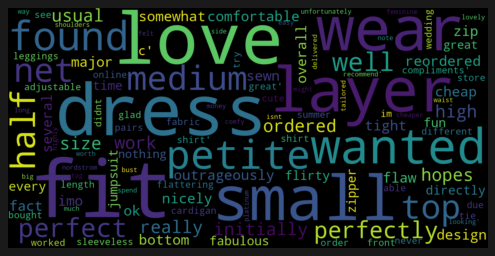

In [55]:
print('Most Frequent Words in High Ratied Review Text for Class Name')
temp = df1['Filtered Review Text'][df1.Rating.astype(int) >= 3]
# Modify Stopwords to Exclude Class types, suchs as "dress"
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df1["Class Name"][df1["Class Name"].notnull()].unique())]
                + ["dress", "petite", "skirt","shirt"])
# Cloud
cloud(temp.values,  stopwords = STOPWORDS) #title= title,

In [56]:
#library
from sklearn.feature_extraction.text import CountVectorizer
#top_n_gram function
def top_n_ngram(corpus,n = None,ngram = 1):
    vec = CountVectorizer(stop_words = 'english',ngram_range=(ngram,ngram)).fit(corpus)
    # Have the count of  all the words for each review text
    bag_of_words = vec.transform(corpus) 
    # Calculates the count of all the word in the whole review text
    sum_words = bag_of_words.sum(axis =0) 
    words_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse = True)
    return words_freq[:n]

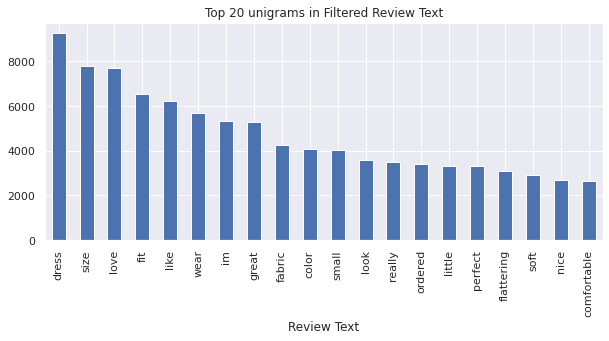

In [58]:
common_words = top_n_ngram(df1['Filtered Review Text'], 20,1)
df2 = pd.DataFrame(common_words, columns = ['Review Text' , 'count'])
plt.figure(figsize =(10,4))
df2.groupby('Review Text').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 unigrams in Filtered Review Text')

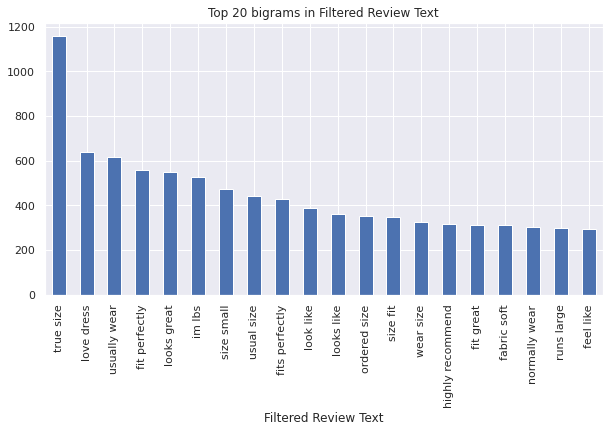

In [59]:
common_words = top_n_ngram(df1['Filtered Review Text'], 20,2)
df3 = pd.DataFrame(common_words, columns = ['Filtered Review Text' , 'count'])
plt.figure(figsize =(10,5))
df3.groupby('Filtered Review Text').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 bigrams in Filtered Review Text')

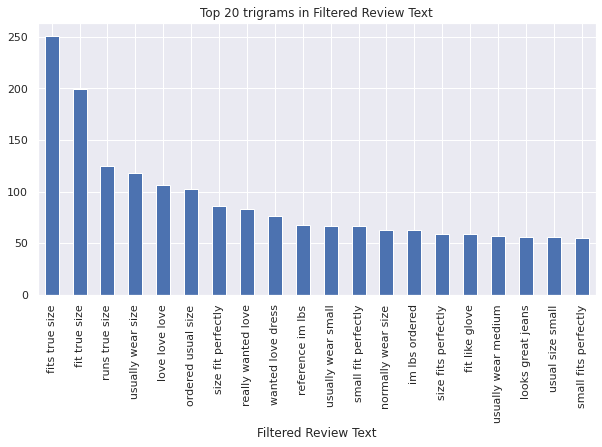

In [60]:
common_words = top_n_ngram(df1['Filtered Review Text'], 20,3)
df4 = pd.DataFrame(common_words, columns = ['Filtered Review Text' , 'count'])
plt.figure(figsize =(10,5))
df4.groupby('Filtered Review Text').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 trigrams in Filtered Review Text')

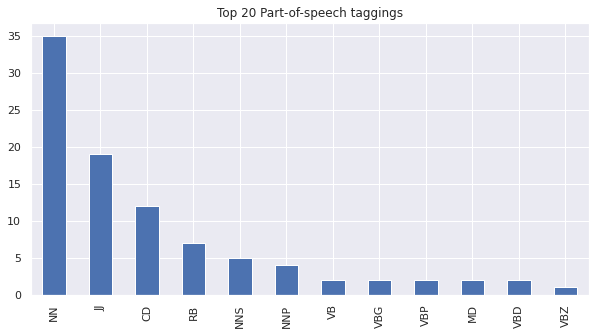

In [61]:
# library for POS
!pip install TextBlob
from textblob import *
blob= TextBlob(str(df1['Filtered Review Text']))
pos = pd.DataFrame(blob.tags,columns =['word','pos'])
pos1 = pos.pos.value_counts()[:20]
plt.figure(figsize = (10,5))
pos1.plot(kind='bar',title ='Top 20 Part-of-speech taggings')